# Main Cluster Size

In this notebook we will obtain an average radius for the main cluster of the neighborhood of the quasiperiodic lattice generated around an arbitrary point. To do this we considered that the arbitrary point is at the center of the main cluster.

Let's load the files that will be used in this notebook.

In [1]:
include("Operaciones_Basicas.jl")
include("Red_Dual.jl")
include("Separacion_Arreglos_X_Y.jl")
include("Generador_Vecindades_Pto_Arbitrario.jl")
include("voronoi.jl")
include("Algoritmo_Voronoi.jl")
include("Algoritmo_Cluster_Principal_Iterado.jl")
include("Algoritmo_Radio_Promedio_Cluster_Principal.jl")

radio_Seguro (generic function with 1 method)

We will use the package "Plots" to visualize the polygons of the Neighborhood and the Voronoi's polygons. So, let's load it.

In [2]:
using Plots
gr();

### Information about the Quasiperiodic Lattice

Create the information of the star vectors required by the GDM algorithm, which determine the symmetry of the quasiperiodic lattice. Also, generate the array that contains the alpha constants and the array with the average distance between stripes.

In [3]:
NSides = 5; #Symmetry of the quasiperiodic lattice

Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors

for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end

Alphas_Array = fill(0.2, NSides); #Array of the alphas constant

Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

### Calculation of the average radius for the main cluster

The algorithm consist of generating various neighborhoods of the quasiperiodic lattice around arbitrary points.

1.- At each of this neighborhoods, we use the algorithm implemented in the function "centroides_Area_Acotada_Iterada()" to get only the centroids of the polygons in the neighborhood that lives in the main cluster (for more details, look at the notebook "Main Cluster's Polygons (Areas Algorithm)" contained in the namesake folder).

2.- Now, we obtained the minimum of the distances generated with considering the next combinations

$$\left\{ |\text{Maximum}X - \text{Point}X|, |\text{Minimum}X - \text{Point}X|, |\text{Maximum}Y - \text{Point}Y|, |\text{Minimum}Y - \text{Point}Y|  \right\},$$

where $\text{Maximum}X(Y)$ is the maximum X (Y) coordinate of all of the vertices of the polygons (quasiperiodic lattice) associated with the centroids obtained in the previous step; $\text{Minimum}X(Y)$ is the minimum X (Y) coordinate of all of the vertices of the polygons (quasiperiodic lattice) associated with the centroids obtained in the previous step and $\text{Point}X(Y)$ is the X (Y) coordinate of the arbitrary point.

3.- We iterate the previous two steps at each of the neighborhoods considered and get the average value of the distance obtained in the step two.

#### Note:
Be careful choosing the right value for the variable "Cluster_Iterations". 

If you choose a big number and you don't have enough polygons, the algorithm will send you an error, because you are "removing" more outer layers by the areas algorithm than the total number of layers you have.

If you choose a small number and you have a lot of polygons (so you have a lot of outer layers of isolated polygons and/or a lot of minor clusters), then you will not only consider the main cluster's polygons (in the Quasiperiodic Lattice) and then your average radius will be higher and could led you to errors when wanting to implement it to some other algorithm.

I recommend using the notebook that is in the folder "Main_Cluster's_Polygons_(Areas_Discrimination)" and try your parameters with the algorithm used in the section *Iterated areas algorithm* until you will be sure that your parameters are right.

In [4]:
Iterations = 100; #Number of the iterations of the algorithm that calculates the number of edges.
Error_Margin = 20; #Margin of error in the integer numbers generated as the projection of the arbitrary point into the star vectors
SL = 1e7; #Size of a half side of the square in which the algorithm generate a random point inside it
Bounded_Area = 1.2; #The value for the area of the polygons that will be a discriminator value in the areas algorithm
Cluster_Iterations = 20; #Number of iterations of the areas algorithm (see "Main_Cluster's_Polygons_(Areas_Algorithm)" for further references) 

#Let's get the average radius for the main clusters
Average_Radius = radio_Seguro(Error_Margin, SL, Cluster_Iterations, Bounded_Area, Iterations, Average_Distance_Stripes, Star_Vectors, Alphas_Array)

Se han realizado 1 iteraciones.
Se han realizado 2 iteraciones.
Se han realizado 3 iteraciones.
Se han realizado 4 iteraciones.
Se han realizado 5 iteraciones.
Se han realizado 6 iteraciones.
Se han realizado 7 iteraciones.
Se han realizado 8 iteraciones.
Se han realizado 9 iteraciones.
Se han realizado 10 iteraciones.
Se han realizado 11 iteraciones.
Se han realizado 12 iteraciones.
Se han realizado 13 iteraciones.
Se han realizado 14 iteraciones.
Se han realizado 15 iteraciones.
Se han realizado 16 iteraciones.
Se han realizado 17 iteraciones.
Se han realizado 18 iteraciones.
Se han realizado 19 iteraciones.
Se han realizado 20 iteraciones.
Se han realizado 21 iteraciones.
Se han realizado 22 iteraciones.
Se han realizado 23 iteraciones.
Se han realizado 24 iteraciones.
Se han realizado 25 iteraciones.
Se han realizado 26 iteraciones.
Se han realizado 27 iteraciones.
Se han realizado 28 iteraciones.
Se han realizado 29 iteraciones.
Se han realizado 30 iteraciones.
Se han realizado 31

39.12647637415849950048851724204723723232746124267578124999999999999999999999982

In this particular notebook, the information about how the neighborhoods were generated (and the average radius, of course) will be of sum relevance for further notebooks, so we must save that info. To do that we use the "DelimitedFiles" package

In [5]:
using DelimitedFiles #To export data in CSV format

In [6]:
writedlm("Informacion_Parche_N_5.csv", [Error_Margin, SL, Cluster_Iterations, Bounded_Area, Iterations, Average_Radius], ',')

### Check fo the average radius

Now, let's generate a neighborhood of the quasiperiodic lattice (with the same characteristics that the ones used to calculate the average radius) around an arbitrary point and let's see if the average radius is a good aproximation

In [5]:
N = 20; #Margin of error in the integer numbers generated as the projection of the arbitrary point into the star vectors
SL = 1e7; #Size of a half side of the square in which the algorithm generate a random point inside it

#Let's get the X and Y coordinates of the vertices of the polygons, also get the coordinates of the point around which
#the neighborhood was generated
X, Y, APoint = region_Local_Voronoi(N, SL, Average_Distance_Stripes, Star_Vectors, Alphas_Array);

#Let's get the X and Y coordinates of the centroids of the polygons generated previously, also get the coordinates as
#tuples of the centroids and the dictionary that relates the centroid's coordinates with the polygons vertices' coordi-
#nates of the polygon that generate the centroid.
X_Centroids, Y_Centroids, Centroids, Centroids_Dictionary = centroides(X, Y);

Cluster_Iterations = 20; #Number of iterations of the areas algorithm desired.
Bounded_Area = 1.2; #The value for the area of the polygons that will be a discriminator value in the areas algorithm

#Let's get the centroids that remains after the iterations of the areas algorithm
Inside_Clusters_Centroids = centroides_Area_Acotada_Iterada(Centroids, Bounded_Area, Cluster_Iterations);

#Let's get the X and Y coordinates of the vertices of the retained polygons in the quasiperiodic lattice
X,Y = centroides_A_Vertices(Inside_Clusters_Centroids, Centroids_Dictionary);

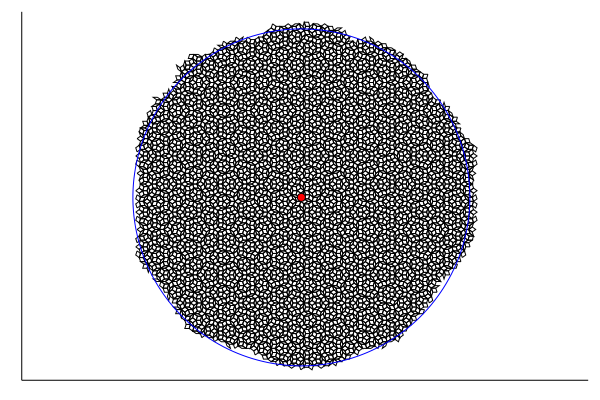

In [6]:
#Let's visualize the new neighborhood of the quasiperiodic lattice
plot()
for i in 1:4:length(X)
    plot!([X[i],X[i+1],X[i+2],X[i+3],X[i]],[Y[i],Y[i+1],Y[i+2],Y[i+3],Y[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black, xaxis = nothing, yaxis = nothing)
end
scatter!([APoint[1]], [APoint[2]], color = "red") #Graph the arbitrary point as a red circle

#Let's overlap a circle, centered in the arbitrary point with radius equal to the average radius calculated.
x(t) = APoint[1] + Average_Radius*cos(t);
y(t) = APoint[2] + Average_Radius*sin(t);

plot!(x, y, 0, 2π, leg=false, color="blue", xaxis = nothing, yaxis = nothing)

Note that the average radius is a good aproximation for the main cluster.